# Importing Libararies

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as w
w.filterwarnings("ignore")



# Loading and Cleaning Datasets

In [ ]:
partners = pd.read_csv("Wind_Energy_Investment_Partners.csv")
turbines = pd.read_csv("wind_turbine_20220114.csv", encoding="latin1")

In [ ]:
partners.head()

,Partner Type,Description,Typical Investment Range,Advantages,Disadvantages,Column 6
0,Utility Companies,Established energy providers looking to expand...,$10M-$100M+,"Experience in energy sector, existing infrastr...",May have competing interests with fossil fuels,NaN
1,Private Equity Firms,Investment firms specializing in energy or inf...,$5M-$500M,"Large capital availability, industry expertise","High return expectations, less patience for lo...",NaN
2,Government Agencies,"Federal, state or local renewable energy initi...",$500K-$50M (grants/loans),"Favorable terms, tax incentives, grants","Bureaucratic process, funding dependent on pol...",NaN
3,Green Energy Funds,Specialized investment vehicles for renewable ...,$1M-$100M,"Aligned mission, experienced in renewable fina...",May have specific project requirements or limi...,NaN
4,Community Investment,"Local community ownership models, cooperatives",$100K-$10M,"Local support, reduced NIMBYism, shared benefits","Slower decision making, smaller capital pools",NaN


In [ ]:
partners.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Partner Type              7 non-null      object 
 1   Description               7 non-null      object 
 2   Typical Investment Range  7 non-null      object 
 3   Advantages                7 non-null      object 
 4   Disadvantages             7 non-null      object 
 5   Column 6                  0 non-null      float64
dtypes: float64(1), object(5)
memory usage: 756.0+ bytes


In [ ]:
turbines.head()

,case_id,faa_ors,faa_asn,usgs_pr_id,eia_id,t_state,t_county,t_fips,p_name,p_year,...,t_rsa,t_ttlh,retrofit,retrofit_year,t_conf_atr,t_conf_loc,t_img_date,t_img_srce,xlong,ylat
0,3072661,NaN,NaN,5149.0,52161.0,CA,Kern County,6029,251 Wind,1987.0,...,NaN,NaN,0,NaN,2,3,5/8/2018,Digital Globe,-118.363762,35.077908
1,3072695,NaN,NaN,5143.0,52161.0,CA,Kern County,6029,251 Wind,1987.0,...,NaN,NaN,0,NaN,2,3,5/8/2018,Digital Globe,-118.364410,35.077435
2,3072704,NaN,NaN,5146.0,52161.0,CA,Kern County,6029,251 Wind,1987.0,...,NaN,NaN,0,NaN,2,3,5/8/2018,Digital Globe,-118.364197,35.077644
3,3063272,19-028134,2014-WTE-4084-OE,NaN,NaN,IA,Story County,19169,30 MW Iowa DG Portfolio,2017.0,...,12271.85,150.0,0,NaN,3,3,4/24/2017,Digital Globe,-93.430367,42.028233
4,3053390,19-028015,2015-WTE-6386-OE,NaN,NaN,IA,Boone County,19015,30 MW Iowa DG Portfolio,2017.0,...,12271.85,150.0,0,NaN,3,3,6/1/2017,Digital Globe,-93.700424,41.977608


In [ ]:
turbines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70808 entries, 0 to 70807
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   case_id        70808 non-null  int64  
 1   faa_ors        65016 non-null  object 
 2   faa_asn        65686 non-null  object 
 3   usgs_pr_id     38263 non-null  float64
 4   eia_id         65015 non-null  float64
 5   t_state        70808 non-null  object 
 6   t_county       70808 non-null  object 
 7   t_fips         70808 non-null  int64  
 8   p_name         70808 non-null  object 
 9   p_year         70195 non-null  float64
 10  p_tnum         70808 non-null  int64  
 11  p_cap          66326 non-null  float64
 12  t_manu         65168 non-null  object 
 13  t_model        65031 non-null  object 
 14  t_cap          65328 non-null  float64
 15  t_hh           64628 non-null  float64
 16  t_rd           64874 non-null  float64
 17  t_rsa          64874 non-null  float64
 18  t_ttlh

In [ ]:
# Clean partners DataFrame
partners_clean = partners.rename(columns={
    "Partner Type":              "partner_type",
    "Description":               "description",
    "Typical Investment Range":  "investment_range",
    "Advantages":                "advantages",
    "Disadvantages":             "disadvantages"
})


In [ ]:
# Drop the empty “Column 6” and any rows missing the partner_type
partners_clean = (
    partners_clean
    .drop(columns=["Column 6"])
    .dropna(subset=["partner_type"])
    .reset_index(drop=True)
)

In [ ]:
# Clean turbines DataFrame
turbines_clean = turbines.rename(columns={
    "case_id":        "turbine_id",
    "t_state":        "state",
    "t_county":       "county",
    "p_name":         "project_name",
    "p_year":         "project_year",
    "p_tnum":         "project_turbine_count",
    "p_cap":          "project_capacity_mw",
    "t_manu":         "manufacturer",
    "t_model":        "model",
    "t_cap":          "capacity_kw",
    "t_hh":           "hub_height_m",
    "t_rd":           "rotor_diameter_m",
    "t_rsa":          "rated_sound_level_db",
    "t_ttlh":         "total_lifetime_hours",
    "t_img_date":     "image_date",
    "xlong":          "longitude",
    "ylat":           "latitude"
})

In [ ]:
# Parse the image_date column
turbines_clean["image_date"] = pd.to_datetime(
    turbines_clean["image_date"],
    format="%m/%d/%Y",
    errors="coerce"
)

# Handle missing values
#   – Numeric columns: fill with median
for col in ["project_year", "project_capacity_mw", "capacity_kw", "hub_height_m", "rotor_diameter_m"]:
    turbines_clean[col].fillna(turbines_clean[col].median(), inplace=True)

#   – Categorical columns: fill with “Unknown”
for col in ["manufacturer", "model"]:
    turbines_clean[col].fillna("Unknown", inplace=True)


In [ ]:
# Quick check
print(partners_clean.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   partner_type      7 non-null      object
 1   description       7 non-null      object
 2   investment_range  7 non-null      object
 3   advantages        7 non-null      object
 4   disadvantages     7 non-null      object
dtypes: object(5)
memory usage: 412.0+ bytes
None


In [ ]:
print(turbines_clean.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70808 entries, 0 to 70807
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   turbine_id             70808 non-null  int64         
 1   faa_ors                65016 non-null  object        
 2   faa_asn                65686 non-null  object        
 3   usgs_pr_id             38263 non-null  float64       
 4   eia_id                 65015 non-null  float64       
 5   state                  70808 non-null  object        
 6   county                 70808 non-null  object        
 7   t_fips                 70808 non-null  int64         
 8   project_name           70808 non-null  object        
 9   project_year           70808 non-null  float64       
 10  project_turbine_count  70808 non-null  int64         
 11  project_capacity_mw    70808 non-null  float64       
 12  manufacturer           70808 non-null  object        
 13  m

# Compute Turbine Capacity (MW)


In [ ]:
#  Add capacity in MW
turbines_clean["capacity_mw"] = turbines_clean["capacity_kw"] / 1000

#  Overall summary
total_capacity = turbines_clean["capacity_mw"].sum()
n_turbines    = turbines_clean.shape[0]
print(f"Total installed capacity: {total_capacity:.0f} MW")
print(f"Total number of turbines: {n_turbines}")


Total installed capacity: 139234 MW
Total number of turbines: 70808


# Top 10 States by Installed Capacity

In [ ]:
#  Top 10 states by installed capacity
cap_by_state = (
    turbines_clean
    .groupby("state")["capacity_mw"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)
print("\nTop 10 states by capacity (MW):")
print(cap_by_state)




Top 10 states by capacity (MW):
state
TX    36088.804
IA    12140.452
OK    10465.565
CA     9388.496
KS     7912.840
IL     6801.758
CO     5129.290
MN     4563.105
ND     4472.080
NM     3838.260
Name: capacity_mw, dtype: float64


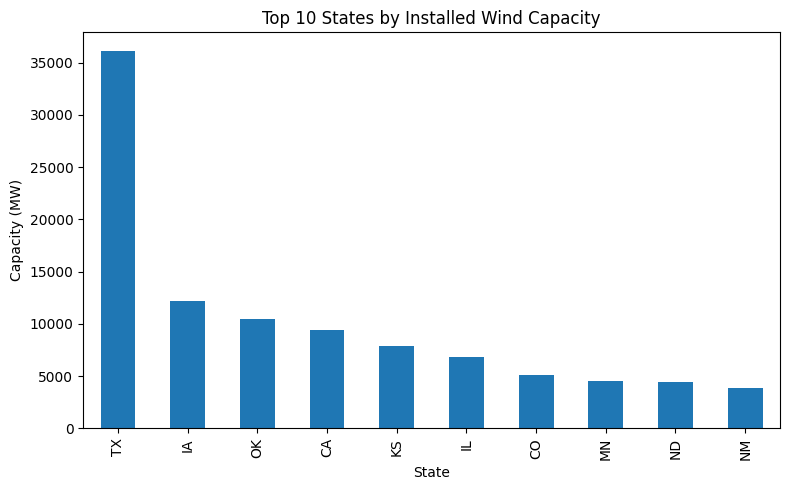

In [ ]:
# Bar chart: Top 10 states
cap_by_state.plot(kind="bar", figsize=(8,5))
plt.title("Top 10 States by Installed Wind Capacity")
plt.xlabel("State")
plt.ylabel("Capacity (MW)")
plt.tight_layout()
plt.savefig("top_10_states_by_capacity.png")
plt.show()


# Turbines Commissioned per Year

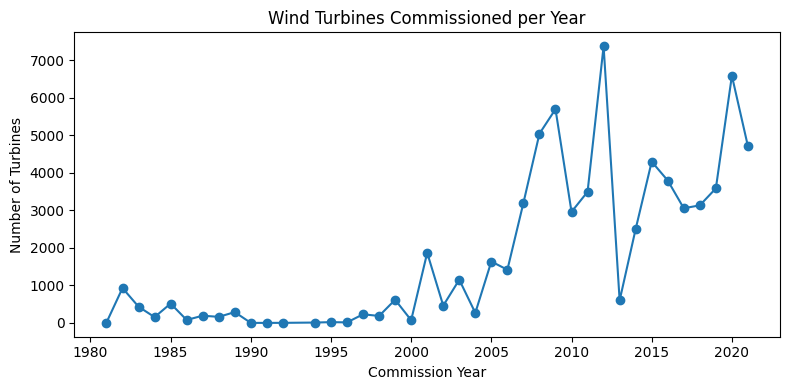

In [ ]:
#  Turbines commissioned per year
turbines_per_year = (
    turbines_clean
    .groupby("project_year")
    .size()
    .sort_index()
)
plt.figure(figsize=(8,4))
plt.plot(turbines_per_year.index, turbines_per_year.values, marker="o")
plt.title("Wind Turbines Commissioned per Year")
plt.xlabel("Commission Year")
plt.ylabel("Number of Turbines")
plt.tight_layout()
plt.savefig("turbines_per_year.png")
plt.show()


# Distribution of Turbine Capacities

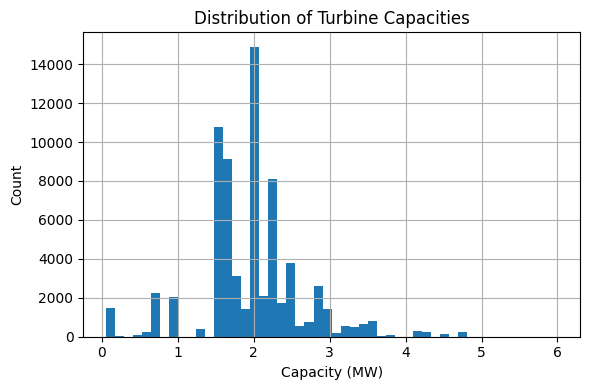

In [ ]:
#  Distribution of turbine capacities
plt.figure(figsize=(6,4))
turbines_clean["capacity_mw"].hist(bins=50)
plt.title("Distribution of Turbine Capacities")
plt.xlabel("Capacity (MW)")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig("capacity_distribution.png")
plt.show()


# Divide states into High/Medium/Low buckets based on the 33rd and 66th percentiles of total capacity.


In [ ]:
# Define which partner types suit each bucket
high_partners   = ["Utility Companies", "Private Equity Firms"]
medium_partners = ["Government Agencies", "Green Energy Funds"]
low_partners    = ["Community Investment", "Individual Investors"]

In [ ]:
# Sum capacity per state (recompute if needed)
state_cap = turbines_clean.groupby("state")["capacity_mw"].sum()

In [ ]:
# Compute 33rd and 66th percentiles
q_low, q_high = state_cap.quantile([0.33, 0.66])
print(f"Low/Medium cutoff: {q_low:.1f} MW, Medium/High cutoff: {q_high:.1f} MW\n")

Low/Medium cutoff: 207.2 MW, Medium/High cutoff: 3229.4 MW



# Categorize States by Capacity

In [ ]:
# Assign each state a category
def categorize(cap):
    if cap > q_high:
        return "High"
    elif cap > q_low:
        return "Medium"
    else:
        return "Low"

state_categories = state_cap.reset_index()
state_categories["category"] = state_categories["capacity_mw"].apply(categorize)

In [ ]:
# Display counts
print("States by capacity category:")
print(state_categories["category"].value_counts(), "\n")

States by capacity category:
category
High      16
Low       15
Medium    15
Name: count, dtype: int64 



# Prepare Partner Recommendations

In [ ]:
# Print out professional-style recommendations
print("=== Recommendations ===\n")
for cat, partners_list in [
    ("High",   high_partners),
    ("Medium", medium_partners),
    ("Low",    low_partners)
]:
    states = state_categories[state_categories["category"] == cat]["state"].tolist()
    snippet = ", ".join(states[:5]) + (f", ... (+{len(states)-5} more)" if len(states)>5 else "")
    print(f"{cat}-capacity states ({len(states)}): {snippet}")
    print("→ Recommended partners:", ", ".join(partners_list), "\n")

=== Recommendations ===

High-capacity states (16): CA, CO, IA, IL, IN, ... (+11 more)
→ Recommended partners: Utility Companies, Private Equity Firms 

Medium-capacity states (15): AZ, HI, ID, ME, MO, ... (+10 more)
→ Recommended partners: Government Agencies, Green Energy Funds 

Low-capacity states (15): AK, AR, CT, DE, FL, ... (+10 more)
→ Recommended partners: Community Investment, Individual Investors 



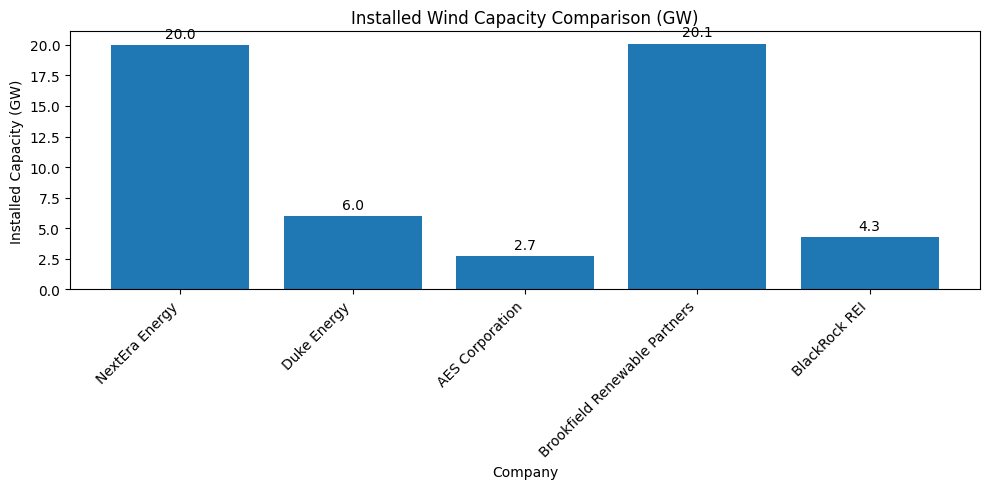

In [ ]:
# Approximate installed wind capacity (GW) for each company
data = {
    'Company': [
        'NextEra Energy',
        'Duke Energy',
        'AES Corporation',
        'Brookfield Renewable Partners',
        'BlackRock REI'
    ],
    'Installed_Capacity_GW': [
        20.0,   # NextEra Energy
        6.0,    # Duke Energy
        2.7,    # AES Corporation
        20.1,   # Brookfield Renewable Partners
        4.3     # BlackRock Renewable Energy Infrastructure
    ]
}

df = pd.DataFrame(data)

plt.figure(figsize=(10,5))
bars = plt.bar(df['Company'], df['Installed_Capacity_GW'])
plt.title('Installed Wind Capacity Comparison (GW)')
plt.xlabel('Company')
plt.ylabel('Installed Capacity (GW)')
plt.xticks(rotation=45, ha='right')

# Annotate each bar with its value
for bar in bars:
    h = bar.get_height()
    plt.annotate(f'{h:.1f}',
                 xy=(bar.get_x() + bar.get_width()/2, h),
                 xytext=(0, 3),
                 textcoords='offset points',
                 ha='center', va='bottom')

plt.tight_layout()
plt.savefig('partner_capacity_comparison.png')
plt.show()
